In [ ]:
import numpy as np
import pandas as pd
import os
import gc
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

#All the scenarios that were used in this project.
Mirai_paths = ["/content/drive/MyDrive/Machine-Learning-For-Network-Traffic-Analysis/Data/BigDataset/IoTScenarios/CTU-IoT-Malware-Capture-34-1/bro/conn.log.labeled",
               "/content/drive/MyDrive/Machine-Learning-For-Network-Traffic-Analysis/Data/BigDataset/IoTScenarios/CTU-IoT-Malware-Capture-43-1/bro/conn.log.labeled",
               "/content/drive/MyDrive/Machine-Learning-For-Network-Traffic-Analysis/Data/BigDataset/IoTScenarios/CTU-IoT-Malware-Capture-44-1/bro/conn.log.labeled",
               "/content/drive/MyDrive/Machine-Learning-For-Network-Traffic-Analysis/Data/BigDataset/IoTScenarios/CTU-IoT-Malware-Capture-49-1/bro/conn.log.labeled",
               "/content/drive/MyDrive/Machine-Learning-For-Network-Traffic-Analysis/Data/BigDataset/IoTScenarios/CTU-IoT-Malware-Capture-52-1/bro/conn.log.labeled"]

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Function that ensures that the right labels are given and that the data is combined.
output_path = "/content/drive/MyDrive/Machine-Learning-For-Network-Traffic-Analysis/Data/combined_data/combined_Mirai_conn_log.csv"

def combine_csv_files(file_paths, output_file, chunksize=1500000):
    labels = ["ts", "uid", "id.orig_h", "id.orig_p", "id.resp_h", "id.resp_p", "proto", "service",
                    "duration", "orig_bytes", "resp_bytes", "conn_state", "local_orig", "local_resp",
                    "missed_bytes", "history", "orig_pkts", "orig_ip_bytes", "resp_pkts", "resp_ip_bytes",
                    "tunnel_parents_label_detailed-label"]
    for file_path in file_paths:
        for chunk in pd.read_csv(file_path, sep='\t', comment="#", header = None, chunksize=chunksize):
            chunk.to_csv(output_file, mode='a', index=False, header=labels)
            labels = False

combine_csv_files(Mirai_paths, output_path)

<ipython-input-11-d55b301cdba0>:13: DtypeWarning: Columns (8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', comment="#", header = None, chunksize=chunksize):
<ipython-input-11-d55b301cdba0>:13: DtypeWarning: Columns (8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', comment="#", header = None, chunksize=chunksize):
<ipython-input-11-d55b301cdba0>:13: DtypeWarning: Columns (8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path, sep='\t', comment="#", header = None, chunksize=chunksize):


Combined CSV saved to /content/drive/MyDrive/Machine-Learning-For-Network-Traffic-Analysis/Data/combined_data/combined_Mirai_conn_log.csv


In [ ]:
#Here the last column "tunnel_parents_label_detailed-label" are split into 3 columns.
first_chunk = True
for chunk in pd.read_csv(output_path, chunksize=1500000):
  chunk[['tunnel_parents', 'label', 'detailed_label']] = chunk['tunnel_parents_label_detailed-label'].str.split(expand=True)
  chunk.drop(['tunnel_parents_label_detailed-label'], axis=1, inplace=True)
  chunk.to_csv(os.path.join("/content/drive/MyDrive/Machine-Learning-For-Network-Traffic-Analysis/Data/combined_data/combined_Mirai_conn_log_fixed_labels.csv"),
               mode='a', index=False, header=first_chunk)
  first_chunk = False
  del chunk
  gc.collect()

<ipython-input-23-86a39d1883cf>:3: DtypeWarning: Columns (8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(output_path, chunksize=1500000):
<ipython-input-23-86a39d1883cf>:3: DtypeWarning: Columns (8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(output_path, chunksize=1500000):
<ipython-input-23-86a39d1883cf>:3: DtypeWarning: Columns (8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(output_path, chunksize=1500000):
<ipython-input-23-86a39d1883cf>:3: DtypeWarning: Columns (8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(output_path, chunksize=1500000):


In [ ]:
#In this part the benign and malicious traffic are separated into two fills so we can take a closer look.
combined_data_path = "/content/drive/MyDrive/Machine-Learning-For-Network-Traffic-Analysis/Data/combined_data/combined_Mirai_conn_log_fixed_labels.csv"
benign_output_path = "/content/drive/MyDrive/Machine-Learning-For-Network-Traffic-Analysis/Data/combined_data/benign_traffic.csv"
malicious_output_path = "/content/drive/MyDrive/Machine-Learning-For-Network-Traffic-Analysis/Data/combined_data/malicious_traffic.csv"
benign_df = pd.DataFrame()
malicious_df = pd.DataFrame()

chunk_size = 15000000
for chunk in pd.read_csv(combined_data_path, chunksize=chunk_size):
    chunk.replace({'-': np.nan, '(empty)': np.nan}, inplace=True)
    benign_chunk = chunk[chunk['label'].isin(['Benign', 'benign'])]
    malicious_chunk = chunk[chunk['label'].isin(['Malicious', 'malicious'])]
    benign_df = pd.concat([benign_df, benign_chunk], ignore_index=True)
    malicious_df = pd.concat([malicious_df, malicious_chunk], ignore_index=True)
    del chunk, benign_chunk, malicious_chunk
    gc.collect()
benign_df.to_csv(benign_output_path, index=False)
malicious_df.to_csv(malicious_output_path, index=False)

Chunk read successfully
Chunk read successfully
Chunk read successfully
Chunk read successfully


<ipython-input-13-e7cbc9c9626c>:18: DtypeWarning: Columns (8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(combined_data_path, chunksize=chunk_size):


Chunk read successfully


<ipython-input-13-e7cbc9c9626c>:18: DtypeWarning: Columns (8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(combined_data_path, chunksize=chunk_size):


Chunk read successfully
Chunk read successfully
Benign traffic saved to /content/drive/MyDrive/Machine-Learning-For-Network-Traffic-Analysis/Data/combined_data/benign_traffic.csv
Malicious traffic saved to /content/drive/MyDrive/Machine-Learning-For-Network-Traffic-Analysis/Data/combined_data/malicious_traffic.csv


In [ ]:
#Find the percentage of missing values and the number of unique values for each column.
files = ["/content/drive/MyDrive/Machine-Learning-For-Network-Traffic-Analysis/Data/combined_data/benign_traffic.csv","/content/drive/MyDrive/Machine-Learning-For-Network-Traffic-Analysis/Data/combined_data/malicious_traffic.csv"]

missing_values_table = pd.DataFrame()
unique_values_table = pd.DataFrame()
chunk_size = 1500000

for file in files:
    file_name = os.path.basename(file)
    rows = 0
    missing_count = None
    unique_sets = {}

    for chunk in pd.read_csv(file, chunksize=chunk_size):
        chunk.replace({'-': np.nan, '(empty)': np.nan}, inplace=True)
        rows += len(chunk)
        if missing_count is None:
            missing_count = chunk.isna().sum()
        else:
            missing_count += chunk.isna().sum()
        for column in chunk.columns:
            if column not in unique_sets:
                unique_sets[column] = set(chunk[column].unique())
            else:
                unique_sets[column].update(chunk[column].unique())


    missing_percentage = (missing_count / rows) * 100
    unique_counts = {column: len(unique_sets[column]) for column in unique_sets}
    missing_values_table = pd.concat([missing_values_table, pd.DataFrame(missing_percentage).T], ignore_index=True)
    unique_values_table = pd.concat([unique_values_table, pd.DataFrame(unique_counts, index=[file_name])], ignore_index=True)


missing_values_table.index = [os.path.basename(file) for file in files]
unique_values_table.index = [os.path.basename(file) for file in files]

print("Percentage of Missing Values Table:")
print(missing_values_table)
print("Unique Values Table:")
print(unique_values_table)


<ipython-input-14-fde396d5132e>:25: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file, chunksize=chunk_size):
<ipython-input-14-fde396d5132e>:25: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file, chunksize=chunk_size):
<ipython-input-14-fde396d5132e>:25: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file, chunksize=chunk_size):
<ipython-input-14-fde396d5132e>:25: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file, chunksize=chunk_size):
<ipython-input-14-fde396d5132e>:25: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file, chunksize=chunk_size):
<ipython-input-14-fde396d5132e>:25: Dtyp

Percentage of Missing Values Table:
                        ts  uid  id.orig_h  id.orig_p  id.resp_h  id.resp_p  \
benign_traffic.csv     0.0  0.0        0.0        0.0        0.0        0.0   
malicious_traffic.csv  0.0  0.0        0.0        0.0        0.0        0.0   

                       proto    service   duration  orig_bytes  ...  \
benign_traffic.csv       0.0  99.997921  99.964902   99.964902  ...   
malicious_traffic.csv    0.0  99.997644  64.893098   64.893098  ...   

                       local_resp  missed_bytes   history  orig_pkts  \
benign_traffic.csv          100.0           0.0  0.016752        0.0   
malicious_traffic.csv       100.0           0.0  0.000000        0.0   

                       orig_ip_bytes  resp_pkts  resp_ip_bytes  \
benign_traffic.csv               0.0        0.0            0.0   
malicious_traffic.csv            0.0        0.0            0.0   

                       tunnel_parents  label  detailed_label  
benign_traffic.csv              1

In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(missing_values_table)

                        ts  uid  id.orig_h  id.orig_p  id.resp_h  id.resp_p  \
benign_traffic.csv     0.0  0.0        0.0        0.0        0.0        0.0   
malicious_traffic.csv  0.0  0.0        0.0        0.0        0.0        0.0   

                       proto    service   duration  orig_bytes  resp_bytes  \
benign_traffic.csv       0.0  99.997921  99.964902   99.964902   99.964902   
malicious_traffic.csv    0.0  99.997644  64.893098   64.893098   64.893098   

                       conn_state  local_orig  local_resp  missed_bytes  \
benign_traffic.csv            0.0       100.0       100.0           0.0   
malicious_traffic.csv         0.0       100.0       100.0           0.0   

                        history  orig_pkts  orig_ip_bytes  resp_pkts  \
benign_traffic.csv     0.016752        0.0            0.0        0.0   
malicious_traffic.csv  0.000000        0.0            0.0        0.0   

                       resp_ip_bytes  tunnel_parents  label  detailed_label  
benign

In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(unique_values_table)

                             ts       uid  id.orig_h  id.orig_p  id.resp_h  \
benign_traffic.csv     20582527  20582527       3080        519   20513658   
malicious_traffic.csv  71954603  71954603          6      65519   58767168   

                       id.resp_p  proto  service  duration  orig_bytes  \
benign_traffic.csv            34      3       11      3276          60   
malicious_traffic.csv         15      2       50     78197         284   

                       resp_bytes  conn_state  local_orig  local_resp  \
benign_traffic.csv             82           8          14          14   
malicious_traffic.csv         123           9          48          48   

                       missed_bytes  history  orig_pkts  orig_ip_bytes  \
benign_traffic.csv                3       28         38             85   
malicious_traffic.csv            12       63        269            433   

                       resp_pkts  resp_ip_bytes  tunnel_parents  label  \
benign_traffic.csv       

In [ ]:
#Drop all the columns that are not needed.
combined_data_path = "/content/drive/MyDrive/Machine-Learning-For-Network-Traffic-Analysis/Data/combined_data/combined_Mirai_conn_log_fixed_labels.csv"
output_path = "/content/drive/MyDrive/Machine-Learning-For-Network-Traffic-Analysis/Data/combined_data/combined_Mirai_conn_log_cleaned.csv"

columns_to_drop = ['uid','service', 'duration', 'orig_bytes', 'resp_bytes', 'local_orig', 'local_resp', 'tunnel_parents', 'id.orig_h', 'id.resp_h']
chunk_size = 1500000
first_chunk = True


for chunk in pd.read_csv(combined_data_path, chunksize=chunk_size):
    chunk.replace({'-': np.nan, '(empty)': np.nan}, inplace=True)
    chunk.drop(columns=columns_to_drop, inplace=True)
    if first_chunk:
        chunk.to_csv(output_path, index=False, mode='w', header=True)
        first_chunk = False
    else:
        chunk.to_csv(output_path, index=False, mode='a', header=False)


<ipython-input-3-87d788bc230e>:18: DtypeWarning: Columns (8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(combined_data_path, chunksize=chunk_size):
<ipython-input-3-87d788bc230e>:18: DtypeWarning: Columns (8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(combined_data_path, chunksize=chunk_size):
<ipython-input-3-87d788bc230e>:18: DtypeWarning: Columns (8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(combined_data_path, chunksize=chunk_size):
<ipython-input-3-87d788bc230e>:18: DtypeWarning: Columns (8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(combined_data_path, chunksize=chunk_size):


Processed dataset saved to /content/drive/MyDrive/Machine-Learning-For-Network-Traffic-Analysis/Data/combined_data/combined_Mirai_conn_log_cleaned.csv


In [ ]:
#Encode the labels and detailed_labels
cleaned_data_path = "/content/drive/MyDrive/Machine-Learning-For-Network-Traffic-Analysis/Data/combined_data/combined_Mirai_conn_log_cleaned.csv"
df = pd.read_csv(cleaned_data_path)
df['label'] = df['label'].replace({'Benign': 0,'benign': 0, 'malicious': 1, 'Malicious': 1})
detailed_label_mapping = {
    np.nan: 0,
    'C&C': 1,
    'DDoS': 2,
    'PartOfAHorizontalPortScan': 3,
    'C&C-FileDownload': 4,
    'FileDownload': 4,
    'Okiru': 5
}
df['detailed_label'] = df['detailed_label'].replace(detailed_label_mapping)
encoded_output_path = "/content/drive/MyDrive/Machine-Learning-For-Network-Traffic-Analysis/Data/combined_data/combined_Mirai_conn_log_encoded.csv"
df.to_csv(encoded_output_path, index=False)



   label detailed_label
0      0              0
1      0              0
2      0              0
3      0              0
4      0              0
Encoded dataset saved to /content/drive/MyDrive/Machine-Learning-For-Network-Traffic-Analysis/Data/combined_data/combined_Mirai_conn_log_encoded.csv


In [ ]:
#Normialize the id.orig_p, id.resp_p, missed_bytes, orig_pkts, orig_ip_bytes, resp_pkts, resp_ip_bytes columns
encoded_data_path = "/content/drive/MyDrive/Machine-Learning-For-Network-Traffic-Analysis/Data/combined_data/combined_Mirai_conn_log_encoded.csv"
normalized_output_path = "/content/drive/MyDrive/Machine-Learning-For-Network-Traffic-Analysis/Data/combined_data/combined_Mirai_conn_log_normalized.csv"
numeric_vals = ['id.orig_p', 'id.resp_p', 'missed_bytes', 'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes']
scaler = MinMaxScaler()
chunk_size = 1500000
first_chunk = True


for chunk in pd.read_csv(encoded_data_path, chunksize=chunk_size):
    chunk[numeric_vals] = scaler.fit_transform(chunk[numeric_vals])
    if first_chunk:
        chunk.to_csv(normalized_output_path, index=False, mode='w', header=True)
        first_chunk = False
    else:
        chunk.to_csv(normalized_output_path, index=False, mode='a', header=False)


<ipython-input-5-6e52d8a31775>:21: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(encoded_data_path, chunksize=chunk_size):
<ipython-input-5-6e52d8a31775>:21: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(encoded_data_path, chunksize=chunk_size):


Normalized dataset saved to /content/drive/MyDrive/Machine-Learning-For-Network-Traffic-Analysis/Data/combined_data/combined_Mirai_conn_log_normalized.csv


In [ ]:
#KNN imputation for the missing values in 'history' column
data_path = "/content/drive/MyDrive/Machine-Learning-For-Network-Traffic-Analysis/Data/combined_data/combined_Mirai_conn_log_normalized.csv"
imputed_data_path = "/content/drive/MyDrive/Machine-Learning-For-Network-Traffic-Analysis/Data/combined_data/combined_Mirai_conn_log_knn_imputed.csv"
columns_to_impute = ['history']
columns_related = ['proto', 'conn_state']
label_encoders = {column: LabelEncoder() for column in columns_to_impute + columns_related}
chunksize=100000


def fit_and_transform_label_encoder(df_chunk, column):
    column_data = df_chunk[column].fillna('missing_value')
    label_encoders[column].fit(column_data)
    return label_encoders[column].transform(column_data)

df_iterator = pd.read_csv(data_path, chunksize=chunksize)

for i, df_chunk in enumerate(df_iterator):
    for column in columns_to_impute + columns_related:
        df_chunk[f'{column}_encoded'] = fit_and_transform_label_encoder(df_chunk, column)
    columns_for_imputation = [f'{col}_encoded' for col in columns_to_impute + columns_related]
    imputer = KNNImputer(n_neighbors=5)
    df_chunk[columns_for_imputation] = imputer.fit_transform(df_chunk[columns_for_imputation])
    df_chunk['history'] = label_encoders['history'].inverse_transform(df_chunk['history_encoded'].astype(int))
    df_chunk.drop([f'{col}_encoded' for col in columns_to_impute + columns_related], axis=1, inplace=True)
    if i == 0:
        df_chunk.to_csv(imputed_data_path, mode='w', index=False)
    else:
        df_chunk.to_csv(imputed_data_path, mode='a', header=False, index=False)



Unique values for history: ['S' 'ShADadttcfF' 'ShADadtcfF' 'Dd' 'D' 'ShADadtctfF' 'DdAtaFf' 'ShAdDaf'
 'ShADacdtfF' 'ShADadtctfFR' 'ShAdDaft' 'ShADadttfF' 'ShAdfDr' 'ShAfdtDr'
 'ShAdDatf' 'ShAdDatfr' 'ShDadAf' 'ShAdD' 'ShADadf' 'ShAdDfr' 'ShAD' 'C'
 'CCCC' 'CCC' 'ShADad' 'ShAdDa' 'ShADadtfF' 'ShADadfR' 'ShADadfF' 'Sr']
Unique values for proto: ['tcp' 'udp']
Unique values for conn_state: ['S0' 'SF' 'S3' 'RSTR' 'S1' 'OTH' 'RSTO' 'REJ']
Chunk 0 shape: (100000, 16), columns: ['ts', 'id.orig_p', 'id.resp_p', 'proto', 'conn_state', 'missed_bytes', 'history', 'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes', 'label', 'detailed_label', 'history_encoded', 'proto_encoded', 'conn_state_encoded']
Unique values for history: ['S' 'Sr']
Unique values for proto: ['tcp']
Unique values for conn_state: ['S0' 'REJ']
Chunk 1 shape: (100000, 16), columns: ['ts', 'id.orig_p', 'id.resp_p', 'proto', 'conn_state', 'missed_bytes', 'history', 'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes', '

<ipython-input-10-47c34b939279>:32: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  for i, df_chunk in enumerate(df_iterator):


Unique values for history: ['S' 'Sr' 'missing_value' 'ShADfdtrFr' 'Dd' 'ShADdfrFr' 'ShADad'
 'ShADdfFr' 'ShADadcgttfF' 'ShADadttfF' 'ShADadfR' 'ShADadfF'
 'ShADadcgtftF' 'ShADaTdtR' 'D']
Unique values for proto: ['tcp' 'icmp' 'udp']
Unique values for conn_state: ['S0' 'REJ' 'OTH' 'SF' 'S1' 'RSTO']
Chunk 727 shape: (100000, 16), columns: ['ts', 'id.orig_p', 'id.resp_p', 'proto', 'conn_state', 'missed_bytes', 'history', 'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes', 'label', 'detailed_label', 'history_encoded', 'proto_encoded', 'conn_state_encoded']
Unique values for history: ['S' 'missing_value' 'Sr' 'R']
Unique values for proto: ['tcp' 'icmp']
Unique values for conn_state: ['S0' 'OTH' 'REJ' 'RSTOS0']
Chunk 728 shape: (100000, 16), columns: ['ts', 'id.orig_p', 'id.resp_p', 'proto', 'conn_state', 'missed_bytes', 'history', 'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes', 'label', 'detailed_label', 'history_encoded', 'proto_encoded', 'conn_state_encoded']
Unique va

In [ ]:
#Creating a CSV file for Benign and Malicious traffic after the KNN imputation for later use
combined_data_path = '/content/drive/MyDrive/Machine-Learning-For-Network-Traffic-Analysis/Data/combined_data/combined_Mirai_conn_log_knn_imputed.csv'
benign_output_path = "/content/drive/MyDrive/Machine-Learning-For-Network-Traffic-Analysis/Data/combined_data/benign_traffic_knn.csv"
malicious_output_path = "/content/drive/MyDrive/Machine-Learning-For-Network-Traffic-Analysis/Data/combined_data/malicious_traffic_knn.csv"
benign_df = pd.DataFrame()
malicious_df = pd.DataFrame()
chunk_size = 15000000

for chunk in pd.read_csv(combined_data_path, chunksize=chunk_size):
    chunk.replace({'-': np.nan, '(empty)': np.nan}, inplace=True)
    benign_chunk = chunk[chunk['label'].isin([0])]
    malicious_chunk = chunk[chunk['label'].isin([1])]
    benign_df = pd.concat([benign_df, benign_chunk], ignore_index=True)
    malicious_df = pd.concat([malicious_df, malicious_chunk], ignore_index=True)
    del chunk, benign_chunk, malicious_chunk
    gc.collect()

benign_df.to_csv(benign_output_path, index=False)
malicious_df.to_csv(malicious_output_path, index=False)

Chunk read successfully
Chunk read successfully
Chunk read successfully
Chunk read successfully


<ipython-input-21-a8a177a36422>:18: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(combined_data_path, chunksize=chunk_size):


Chunk read successfully
Chunk read successfully


<ipython-input-21-a8a177a36422>:18: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(combined_data_path, chunksize=chunk_size):


Chunk read successfully
Benign traffic saved to /content/drive/MyDrive/Machine-Learning-For-Network-Traffic-Analysis/Data/combined_data/benign_traffic_knn.csv
Malicious traffic saved to /content/drive/MyDrive/Machine-Learning-For-Network-Traffic-Analysis/Data/combined_data/malicious_traffic_knn.csv


In [ ]:
#This part creates two tabels, which shows if the pre-processing was done properly
files = ["/content/drive/MyDrive/Machine-Learning-For-Network-Traffic-Analysis/Data/combined_data/benign_traffic_knn.csv",
         "/content/drive/MyDrive/Machine-Learning-For-Network-Traffic-Analysis/Data/combined_data/malicious_traffic_knn.csv"]
missing_values_table = pd.DataFrame()
unique_values_table = pd.DataFrame()

for file in files:
    file_name = os.path.basename(file)
    chunk_size = 1500000
    total_rows = 0
    missing_counts = None
    unique_sets = {}

    for chunk in pd.read_csv(file, chunksize=chunk_size):
        chunk.replace({'-': np.nan, '(empty)': np.nan}, inplace=True)
        total_rows += len(chunk)
        if missing_counts is None:
            missing_counts = chunk.isna().sum()
        else:
            missing_counts += chunk.isna().sum()
        for column in chunk.columns:
            if column not in unique_sets:
                unique_sets[column] = set(chunk[column].unique())
            else:
                unique_sets[column].update(chunk[column].unique())

    missing_percentage = (missing_counts / total_rows) * 100
    unique_counts = {column: len(unique_sets[column]) for column in unique_sets}
    missing_values_table = pd.concat([missing_values_table, pd.DataFrame(missing_percentage).T], ignore_index=True)
    unique_values_table = pd.concat([unique_values_table, pd.DataFrame(unique_counts, index=[file_name])], ignore_index=True)

missing_values_table.index = [os.path.basename(file) for file in files]
unique_values_table.index = [os.path.basename(file) for file in files]

print("Percentage of Missing Values Table:")
print(missing_values_table)

print("Unique Values Table:")
print(unique_values_table)

<ipython-input-24-402417445e0e>:23: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file, chunksize=chunk_size):
<ipython-input-24-402417445e0e>:23: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file, chunksize=chunk_size):


Percentage of Missing Values Table:
                            ts  id.orig_p  id.resp_p  proto  conn_state  \
benign_traffic_knn.csv     0.0        0.0        0.0    0.0         0.0   
malicious_traffic_knn.csv  0.0        0.0        0.0    0.0         0.0   

                           missed_bytes  history  orig_pkts  orig_ip_bytes  \
benign_traffic_knn.csv              0.0      0.0        0.0            0.0   
malicious_traffic_knn.csv           0.0      0.0        0.0            0.0   

                           resp_pkts  resp_ip_bytes  label  detailed_label  
benign_traffic_knn.csv           0.0            0.0    0.0             0.0  
malicious_traffic_knn.csv        0.0            0.0    0.0             0.0  
Unique Values Table:
                                 ts  id.orig_p  id.resp_p  proto  conn_state  \
benign_traffic_knn.csv     20582527       1180         69      3           8   
malicious_traffic_knn.csv  71954603      74300         27      2           9   

          

In [ ]:
#One-hot encoding for the categorial values
data_path = "/content/drive/MyDrive/Machine-Learning-For-Network-Traffic-Analysis/Data/combined_data/combined_Mirai_conn_log_knn_imputed.csv"
one_hot_encoded_output_path = "/content/drive/MyDrive/Machine-Learning-For-Network-Traffic-Analysis/Data/combined_data/combined_Mirai_conn_log_one_hot_encoded.csv"
df_iterator = pd.read_csv(data_path, chunksize=100000)

for i, df_chunk in enumerate(df_iterator):
    df_chunk_one_hot = pd.get_dummies(df_chunk, columns=['proto', 'conn_state', 'history'], prefix=['proto', 'conn_state', 'history'], drop_first=True)
    if i == 0:
        df_chunk_one_hot.to_csv(one_hot_encoded_output_path, mode='w', index=False)
    else:
        df_chunk_one_hot.to_csv(one_hot_encoded_output_path, mode='a', header=False, index=False)



Processed chunk 1: shape (100000, 47)
Processed chunk 2: shape (100000, 12)
Processed chunk 3: shape (100000, 21)
Processed chunk 4: shape (100000, 15)
Processed chunk 5: shape (100000, 19)
Processed chunk 6: shape (100000, 19)
Processed chunk 7: shape (100000, 17)
Processed chunk 8: shape (100000, 18)
Processed chunk 9: shape (100000, 15)
Processed chunk 10: shape (100000, 19)
Processed chunk 11: shape (100000, 18)
Processed chunk 12: shape (100000, 15)
Processed chunk 13: shape (100000, 17)
Processed chunk 14: shape (100000, 15)
Processed chunk 15: shape (100000, 13)
Processed chunk 16: shape (100000, 19)
Processed chunk 17: shape (100000, 18)
Processed chunk 18: shape (100000, 15)
Processed chunk 19: shape (100000, 12)
Processed chunk 20: shape (100000, 12)
Processed chunk 21: shape (100000, 15)
Processed chunk 22: shape (100000, 17)
Processed chunk 23: shape (100000, 12)
Processed chunk 24: shape (100000, 17)
Processed chunk 25: shape (100000, 12)
Processed chunk 26: shape (100000,

<ipython-input-1-c8c0124e1b32>:11: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  for i, df_chunk in enumerate(df_iterator):


Processed chunk 728: shape (100000, 31)
Processed chunk 729: shape (100000, 17)
Processed chunk 730: shape (100000, 21)
Processed chunk 731: shape (100000, 20)
Processed chunk 732: shape (100000, 19)
Processed chunk 733: shape (100000, 17)
Processed chunk 734: shape (100000, 25)
Processed chunk 735: shape (100000, 21)
Processed chunk 736: shape (100000, 20)
Processed chunk 737: shape (100000, 19)
Processed chunk 738: shape (100000, 20)
Processed chunk 739: shape (100000, 19)
Processed chunk 740: shape (100000, 21)
Processed chunk 741: shape (100000, 17)
Processed chunk 742: shape (100000, 23)
Processed chunk 743: shape (100000, 19)
Processed chunk 744: shape (100000, 17)
Processed chunk 745: shape (100000, 19)
Processed chunk 746: shape (100000, 17)
Processed chunk 747: shape (100000, 19)
Processed chunk 748: shape (100000, 17)
Processed chunk 749: shape (100000, 17)
Processed chunk 750: shape (100000, 17)
Processed chunk 751: shape (100000, 17)
Processed chunk 752: shape (100000, 19)


In [ ]:
#Ensures that the one-hot encoded values are either 0 or 1 using skLearn OneHotEncoder, since the categorial values is norminal of nature.
path = "/content/drive/MyDrive/Machine-Learning-For-Network-Traffic-Analysis/Data/combined_data/combined_Mirai_conn_log_one_hot_encoded.csv"
output_path = "/content/drive/MyDrive/Machine-Learning-For-Network-Traffic-Analysis/Data/combined_data/combined_Mirai_done.csv"
chunk_size = 1500000
first_chunk = True

#Reads one chunk at a time to ensure that the program doesn't run out of memory.
for chunk in pd.read_csv(path, chunksize=chunk_size):
    chunk = chunk.replace({False: 0, True: 1})
    #Ensures that the headers are correct, else they might end up in the dataframe.
    if first_chunk:
        chunk.to_csv(output_path, index=False, mode='w', header=True)
        first_chunk = False
    else:
        chunk.to_csv(output_path, index=False, mode='a', header=False)

#Checks if the values are either 0 or 1 and we can proceed.
for chunk in pd.read_csv("/content/drive/MyDrive/Machine-Learning-For-Network-Traffic-Analysis/Data/combined_data/combined_Mirai_done.csv", chunksize=1000):
  print(chunk)
  break


<ipython-input-4-c5e9838401c9>:13: DtypeWarning: Columns (12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(one_hot_encoded_data_path, chunksize=chunk_size):
<ipython-input-4-c5e9838401c9>:13: DtypeWarning: Columns (12,13,14,15,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(one_hot_encoded_data_path, chunksize=chunk_size):
<ipython-input-4-c5e9838401c9>:13: DtypeWarning: Columns (10,11,12,13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(one_hot_encoded_data_path, chunksize=chunk_size):
<ipython-input-4-c5e9838401c9>:13: DtypeWarning: Columns (10,11,12,13,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(one_hot_encoded_data_path, chunksize=chunk

Binary encoded dataset saved to /content/drive/MyDrive/Machine-Learning-For-Network-Traffic-Analysis/Data/combined_data/combined_Mirai_done.csv
               ts  id.orig_p  id.resp_p  missed_bytes  orig_pkts  \
0    1.545404e+09   0.628686   0.001254      0.000000   0.000163   
1    1.545404e+09   0.628686   0.001254      0.000000   0.000054   
2    1.545404e+09   0.628686   0.001254      0.000000   0.000054   
3    1.545404e+09   0.628686   0.001254      0.181818   0.005097   
4    1.545404e+09   0.628717   0.001254      0.000000   0.000163   
..            ...        ...        ...           ...        ...   
995  1.545408e+09   0.767965   0.104502      0.000000   0.000054   
996  1.545408e+09   0.767996   0.104502      0.000000   0.000163   
997  1.545408e+09   0.766188   0.104502      0.000000   0.000380   
998  1.545408e+09   0.767996   0.104502      0.000000   0.000054   
999  1.545408e+09   0.001884   0.001928      0.000000   0.000054   

     orig_ip_bytes  resp_pkts  resp_ip_

<ipython-input-9-e08b391814f7>:7: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(path, chunksize=chunk_size):
<ipython-input-9-e08b391814f7>:7: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(path, chunksize=chunk_size):


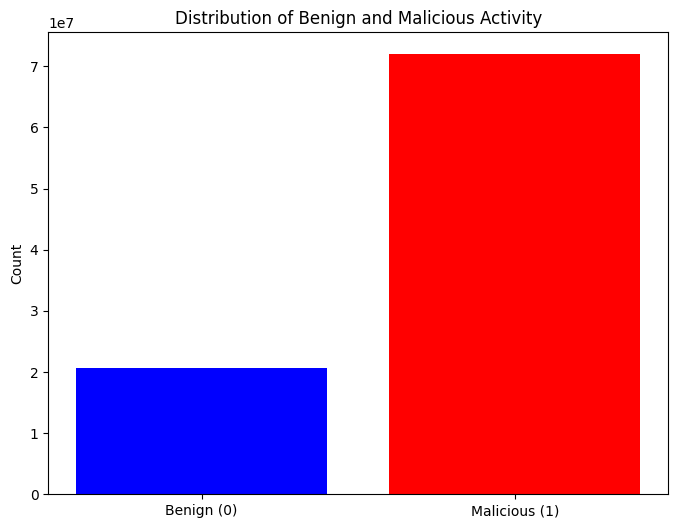

In [ ]:
#Plot the distribution of benign and malicious activity
path = "/content/drive/MyDrive/Machine-Learning-For-Network-Traffic-Analysis/Data/combined_data/combined_Mirai_conn_log_knn_imputed.csv"

chunk_size = 1000000
label_counts = {0: 0, 1: 0}
for chunk in pd.read_csv(path, chunksize=chunk_size):
    label_counts[0] += (chunk['label'] == 0).sum()
    label_counts[1] += (chunk['label'] == 1).sum()
    del chunk
    gc.collect()

plt.figure(figsize=(8, 6))
plt.bar(['Benign (0)', 'Malicious (1)'], [label_counts[0], label_counts[1]], color=['blue', 'red'])
plt.title('Distribution of Benign and Malicious Activity')
plt.ylabel('Count')
plt.show()

In [ ]:
for i in pd.read_csv("/content/drive/MyDrive/Machine-Learning-For-Network-Traffic-Analysis/Data/combined_data/combined_Mirai_conn_log_knn_imputed.csv", chunksize=1000):
  print(i.columns)
  break

Index(['ts', 'id.orig_p', 'id.resp_p', 'proto', 'conn_state', 'missed_bytes',
       'history', 'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes',
       'label', 'detailed_label'],
      dtype='object')


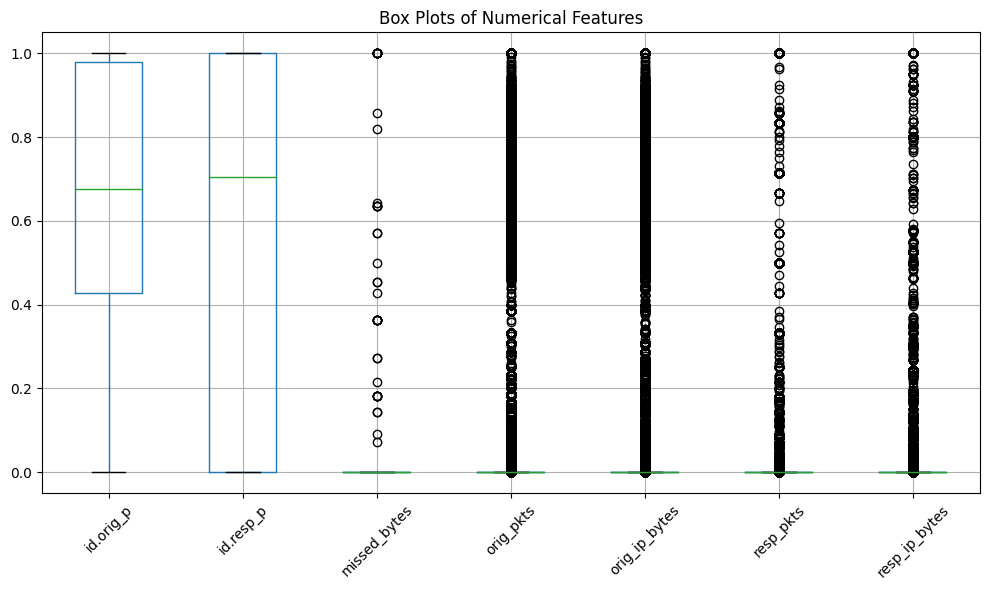

In [ ]:
#Boxplot for the numerical features
path = "/content/drive/MyDrive/Machine-Learning-For-Network-Traffic-Analysis/Data/combined_data/combined_Mirai_conn_log_knn_imputed.csv"
numerical_features = ['id.orig_p', 'id.resp_p', 'missed_bytes','orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes']
chunk_size = 1500000
numerical_dataframe = pd.DataFrame()

# Numerical features
numerical_features = ['id.orig_p', 'id.resp_p', 'missed_bytes', 'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes']

# Initialize an empty DataFrame to collect data for plotting
data = pd.DataFrame()

# Load the data in chunks and concatenate only the relevant columns
for chunk in pd.read_csv(path, usecols=numerical_features, chunksize=chunk_size):
    data = pd.concat([data, chunk], axis=0)

# Generate box plots for the numerical features
plt.figure(figsize=(10, 6))
data[numerical_features].boxplot()
plt.xticks(rotation=45)
plt.title("Box Plots of Numerical Features")
plt.tight_layout()

# Show the plot
plt.show()
